# Probability basics






### Probability Formula

$$ P(\text{event}) = \frac{\text{Number of outcomes of event}}{\text{Total number of outcomes}} $$


1. In your inbox if you have five spam emails and six promotional emails. What is the probability that the email you select is an spam?

In [2]:
# Given data
num_spam_emails = 5
num_promotional_emails = 6

# Calculate the ratio of spam emails
probability = num_spam_emails / (num_spam_emails + num_promotional_emails)
probability = round(probability, 3)

# Display the result
print(f"The probability of spam emails in the inbox is: {probability}")

The probability of spam emails in the inbox is: 0.455


##Complement of probability


$$ P(\text{ham}) = 1 - P(\text{spam}) $$

In [3]:
print(f"The probability of ham emails is : {round(1 - probability,3)} ")

The probability of ham emails is : 0.545 


## Disjoint and Joint events

2. Suppose you have an inbox with twenty emails, and you define the following events:


---


Event A : Receiving seventeen spam emails from fake recruiter with a job offered with initial payment.
Event B : Receiving three proper rejection letter(ham) from a reputed company .

Calculate the probability for
a) An email viewed is a spam or ham from the inbox
b) An email viewed is spam and is from a reputed company

In [4]:
# Given data
total_emails = 20
num_spam_emails = 17
num_ham_emails = 3

# Event A: Receiving a spam email
prob_spam = num_spam_emails / total_emails

# Event B: Receiving an email from your friend (ham)
prob_ham = num_ham_emails / total_emails

# Part 1: Disjoint Events
# Probability of the union of disjoint events P(A U B) = P(A) + P(B)
prob_disjoint = prob_spam + prob_ham

# Part 2: Joint Event
# Probability of the intersection of events P(A ∩ B) = 0
#(assuming an email can't be both spam and from reputed company)
prob_joint = 0

# Display the results
print(f"Probability of Receiving a Spam Email: {prob_spam}")
print(f"Probability of Receiving an Email from reputed company (Ham): {prob_ham}")
print(f"Probability of Disjoint Events (Spam U Ham): {prob_disjoint}")
print(f"Probability of Joint Events (Spam ∩ Ham): {prob_joint}")

Probability of Receiving a Spam Email: 0.85
Probability of Receiving an Email from reputed company (Ham): 0.15
Probability of Disjoint Events (Spam U Ham): 1.0
Probability of Joint Events (Spam ∩ Ham): 0


## Conditional probability

$$ P(B|A) = \frac{P(A \cap B)}{P(A)} $$

**If P(B|A) = P(B) and P(A|B) = P(A), then the events are independent**

## Product rule

*   Independent events
$$ P(A \cap B) = P(A) \cdot P(B) $$

*   Dependent events
$$ P(A \cap B) = P(A) \cdot P(B|A) $$




3. In an office with 100 employees, a recreational activity was organized. Forty employees play soccer, and sixty do not. Among the 40 employees who play soccer, 80% of them are fans of Ronaldo. How many employees play soccer and are fans of Ronaldo?





In [5]:
# Given data
total_employees = 100
soccer_players = 40
ronaldo_fans_percentage = 0.8

# Regular calculation
prob_employ_play_soccer = soccer_players / total_employees
prob_employ_not_play_soccer = 1 - prob_employ_play_soccer
prob_employ_play_soccer_and_ronaldo_fan = ronaldo_fans_percentage * prob_employ_play_soccer

# Product rule
prob_soccer = 0.4
prob_ronaldo_fan_given_soccer = 0.8
prob_soccer_and_ronaldo = prob_soccer * prob_ronaldo_fan_given_soccer

# Output statements
print(f"Probability an employee plays soccer: {prob_employ_play_soccer:.2f}")
print(f"Probability an employee does not play soccer: {prob_employ_not_play_soccer:.2f}")
print(f"Probability an employee plays soccer and is a Ronaldo fan: {prob_employ_play_soccer_and_ronaldo_fan:.2f}")

print("\nUsing the Product Rule:")
print(f"Probability an employee plays soccer and is a Ronaldo fan: {prob_soccer_and_ronaldo:.2f}")


Probability an employee plays soccer: 0.40
Probability an employee does not play soccer: 0.60
Probability an employee plays soccer and is a Ronaldo fan: 0.32

Using the Product Rule:
Probability an employee plays soccer and is a Ronaldo fan: 0.32


###Note:
1. Events are considered disjoint if they never occur at the same time; these are also known as mutually exclusive events. Events are considered independent if they are unrelated.

2. Conditional probabilities depend on a previous result or event occurring. A conditional probability would look at such events in relationship with one another. Conditional probability is thus the likelihood of an event or outcome occurring based on the occurrence of some other event or prior outcome.

3. Two events are said to be independent if one event occurring does not affect the probability that the other event will occur. However, if one event occurring or not does, in fact, affect the probability that the other event will occur, the two events are said to be dependent. If events are independent, then the probability of some event B is not contingent on what happens with event A. A conditional probability, therefore, relates to those events that are dependent on one another.

## Birthday problem

In [6]:
# Importing libraries
import random

# Assigning the number of months and days in a year to pick an random date
months_days = {"Jan" : 31, "Feb" : 28, "Mar": 31, "Apr": 30, "May" : 31, "Jun" : 30, "Jul": 31, "Aug" : 31, "Sep" : 30, "Oct" : 31, "Nov": 30, "Dec": 31}

##### Functions for the problem

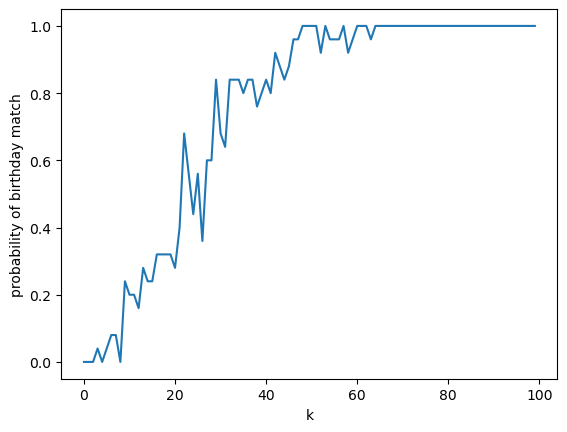

In [9]:
# Function to get date and month

def get_birthday():
    month = random.choice(list(months_days.keys()))
    date = random.randint(1, months_days[month])
    return (month, date)


# Function to get a list of birthday of random individuals

def birthday_lists(num_people):
    list_birthday = []
    for i in range(0, num_people + 1):
        list_birthday.append(get_birthday())
    return list_birthday

# Function to match birthdays

def birthday_check_match(list_of_bdays):
    match = False
    for i_2 in range(len(list_of_bdays)) :
        for bday in list_of_bdays[i_2 + 1 :] :
            if list_of_bdays[i_2][0] == bday[0] and list_of_bdays[i_2][1] == bday[1] :
                match = True
                break
    return match

# Function to count the number of matches for the trials
def num_matches(num_people, num_trials):
    total_matches = 0
    for i_3 in range(num_trials):
        match_in_each_trial = birthday_check_match(birthday_lists(num_people))
        total_matches += match_in_each_trial

    final_matches = total_matches / num_trials
    return final_matches

import matplotlib.pyplot as plt

k = 100
n = 25
X = [x for x in range(k)]
match_probability = [num_matches(x, n) for x in X]
plt.plot(X, match_probability)
plt.xlabel('k')
plt.ylabel('probability of birthday match')
plt.show()
